Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

### Import libraries and datasets

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
train_df = pd.read_csv("train.csv")
meal_df = pd.read_csv("meal_info.csv")
center_df = pd.read_csv("fulfilment_center_info.csv")

In [115]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [116]:
meal_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [117]:
center_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [118]:
train_df = pd.merge(train_df,center_df,on='center_id')
train_df = pd.merge(train_df,meal_df,on='meal_id')

In [119]:
train_df.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
5,1493612,6,55,1885,146.53,146.53,0,0,285,647,56,TYPE_C,2.0,Beverages,Thai
6,1110832,7,55,1885,145.53,146.53,0,0,148,647,56,TYPE_C,2.0,Beverages,Thai
7,1461167,8,55,1885,146.53,145.53,0,0,135,647,56,TYPE_C,2.0,Beverages,Thai
8,1102364,9,55,1885,134.83,134.83,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai
9,1018130,10,55,1885,144.56,143.56,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai


In [120]:
test_df = pd.read_csv("test_QoiMO9B.csv")
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


### Understanding the summary of the dataset

In [121]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


In [122]:
train_df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [123]:
train_df['category'].unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Salad', 'Fish', 'Soup'], dtype=object)

In [124]:
train_df['emailer_for_promotion'].unique()

array([0, 1], dtype=int64)

### Check for missing values

In [125]:
train_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [126]:
train_df.apply(lambda x : len(x.unique()))

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [127]:
test_df = pd.merge(test_df,center_df,on='center_id')
test_df = pd.merge(test_df, meal_df,on='meal_id')
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


## Light Data Exploration

#### Numeric Data

In [128]:
df_numerical = train_df[['week','checkout_price','base_price','num_orders']]

### Histogram can be used to check outliers for continuous variable

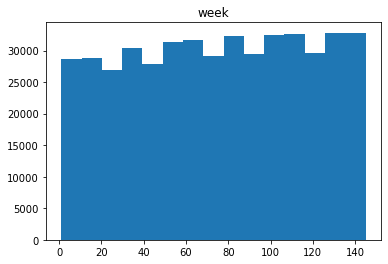

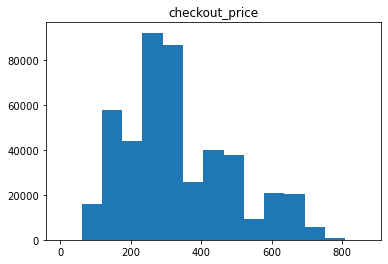

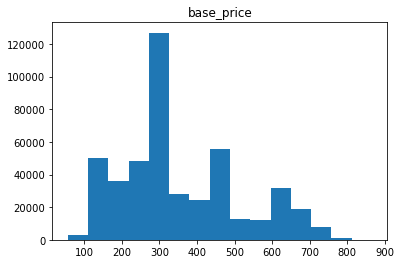

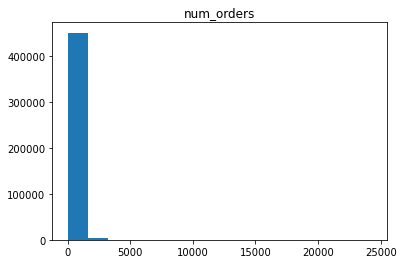

In [129]:
for i in df_numerical.columns:
    plt.hist(df_numerical[i],bins=15)
    plt.title(i)
    plt.show()

we can see that meal price mostly fall in the range of 300

In [130]:
df_numerical.corr()

,week,checkout_price,base_price,num_orders
week,1.000000,0.026581,0.028614,-0.017210
checkout_price,0.026581,1.000000,0.953389,-0.282108
base_price,0.028614,0.953389,1.000000,-0.222306
num_orders,-0.017210,-0.282108,-0.222306,1.000000


checkout price and base price are highly correlated as 

<AxesSubplot:>

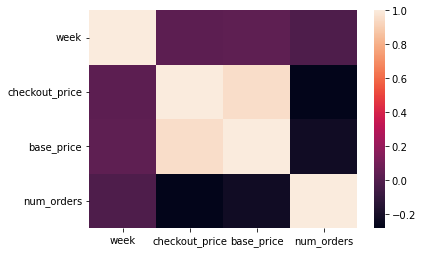

In [131]:
sns.heatmap(df_numerical.corr())

#### Categorical Data

In [132]:
df_categorical = train_df[['center_id','meal_id','emailer_for_promotion','homepage_featured']]

In [133]:
train_df.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


emailer_for_promotion and homepage_featured is positive correlated to num_orders but not very high,
checkout_price and base_price are negative correlated,
id has very low correlation with num_of_orders

#### Plot a matrix correlation plot

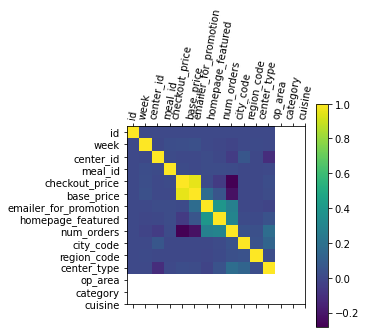

In [134]:
plt.matshow(train_df.corr())
plt.xticks(range(len(train_df.columns)), train_df.columns,rotation=80)
plt.yticks(range(len(train_df.columns)), train_df.columns)
plt.colorbar()
plt.show()

In [135]:
train_df[['emailer_for_promotion']]

,emailer_for_promotion
0,0
1,0
2,0
3,0
4,0
...,...
456543,0
456544,0
456545,0
456546,0


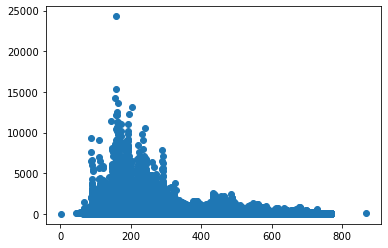

In [136]:
plt.scatter(x=train_df.checkout_price,y=train_df.num_orders)

#### seaborn give more information throught scatterplot

<AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>

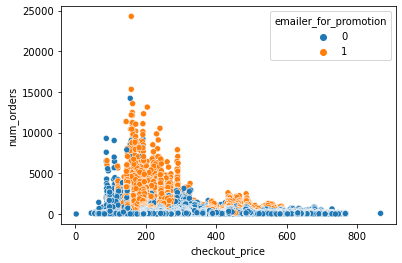

In [137]:
sns.scatterplot(x=train_df.checkout_price,y=train_df.num_orders,hue=train_df.emailer_for_promotion
            )

We can more orders also applied for when there is emailer for promotion

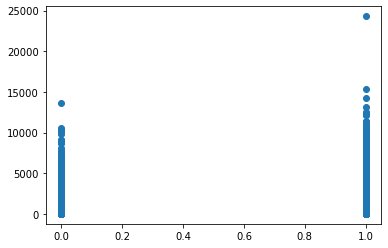

In [138]:
plt.scatter(x=train_df.homepage_featured,y=train_df.num_orders)

### Overall Order Trend

C:\Users\jowen\anaconda3\envs\azureml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='week', ylabel='num_orders'>

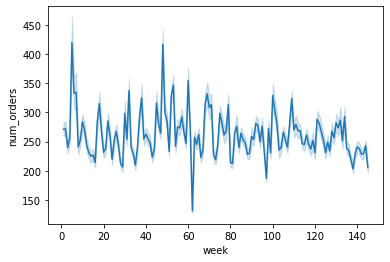

In [139]:
sns.lineplot(train_df['week'],train_df['num_orders'])


Week 5 and 48 has highest orders while week 62 has lowest orders

C:\Users\jowen\anaconda3\envs\azureml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>

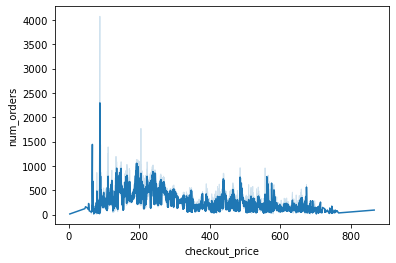

In [140]:
sns.lineplot(train_df['checkout_price'],train_df['num_orders'])

C:\Users\jowen\anaconda3\envs\azureml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='category', ylabel='num_orders'>

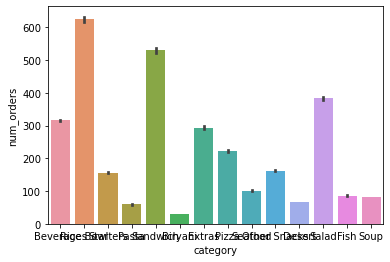

In [141]:
sns.barplot(train_df.category,train_df.num_orders)

In [142]:
np.random.randint([10,1])

array([9, 0])

### Feature Importance

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [144]:
target = train_df[['num_orders']]
features = train_df.drop(['num_orders'],axis=1)

In [145]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 14 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 72.2+ MB


### Encoding categorical variable`

In [146]:
features['center_type'] = features['center_type'].astype('category')
features['category'] = features['category'].astype('category')
features['cuisine'] = features['cuisine'].astype('category')

In [147]:
features['center_type'] = features['center_type'].cat.codes
features['category'] = features['category'].cat.codes
features['cuisine'] = features['cuisine'].cat.codes

In [148]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 14 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null int8
op_area                  456548 non-null float64
category                 456548 non-null int8
cuisine                  456548 non-null int8
dtypes: float64(3), int64(8), int8(3)
memory usage: 63.1 MB


### Using Random Forest feature importance

In [149]:
randomforest = RandomForestRegressor(n_estimators=150)
randomforest.fit(features, target)

C:\Users\jowen\anaconda3\envs\azureml\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

<BarContainer object of 14 artists>

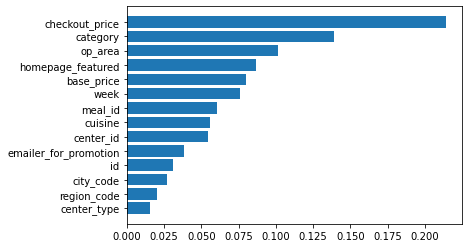

In [150]:
sort = randomforest.feature_importances_.argsort()
plt.barh(features.columns[sort],randomforest.feature_importances_[sort])


we can see that checkout price plays an important role in affecting the target which is num_orders
from this we can eliminate redundant input features

## Select From Model automatically select feature with mean importance higher than a borderline

In [151]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators=100))
sel.fit(features,target)
sel.get_support()

C:\Users\jowen\anaconda3\envs\azureml\lib\site-packages\sklearn\feature_selection\_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True, False])

In [167]:
selected_features = features.columns[(sel.get_support())]
selected_features

Index(['week', 'checkout_price', 'base_price', 'homepage_featured', 'op_area',
       'category'],
      dtype='object')

,week,checkout_price,base_price,homepage_featured,op_area,category
0,1,136.83,152.29,0,2.0,0
1,2,135.83,152.29,0,2.0,0
2,3,132.92,133.92,0,2.0,0
3,4,135.86,134.86,0,2.0,0
4,5,146.50,147.50,0,2.0,0


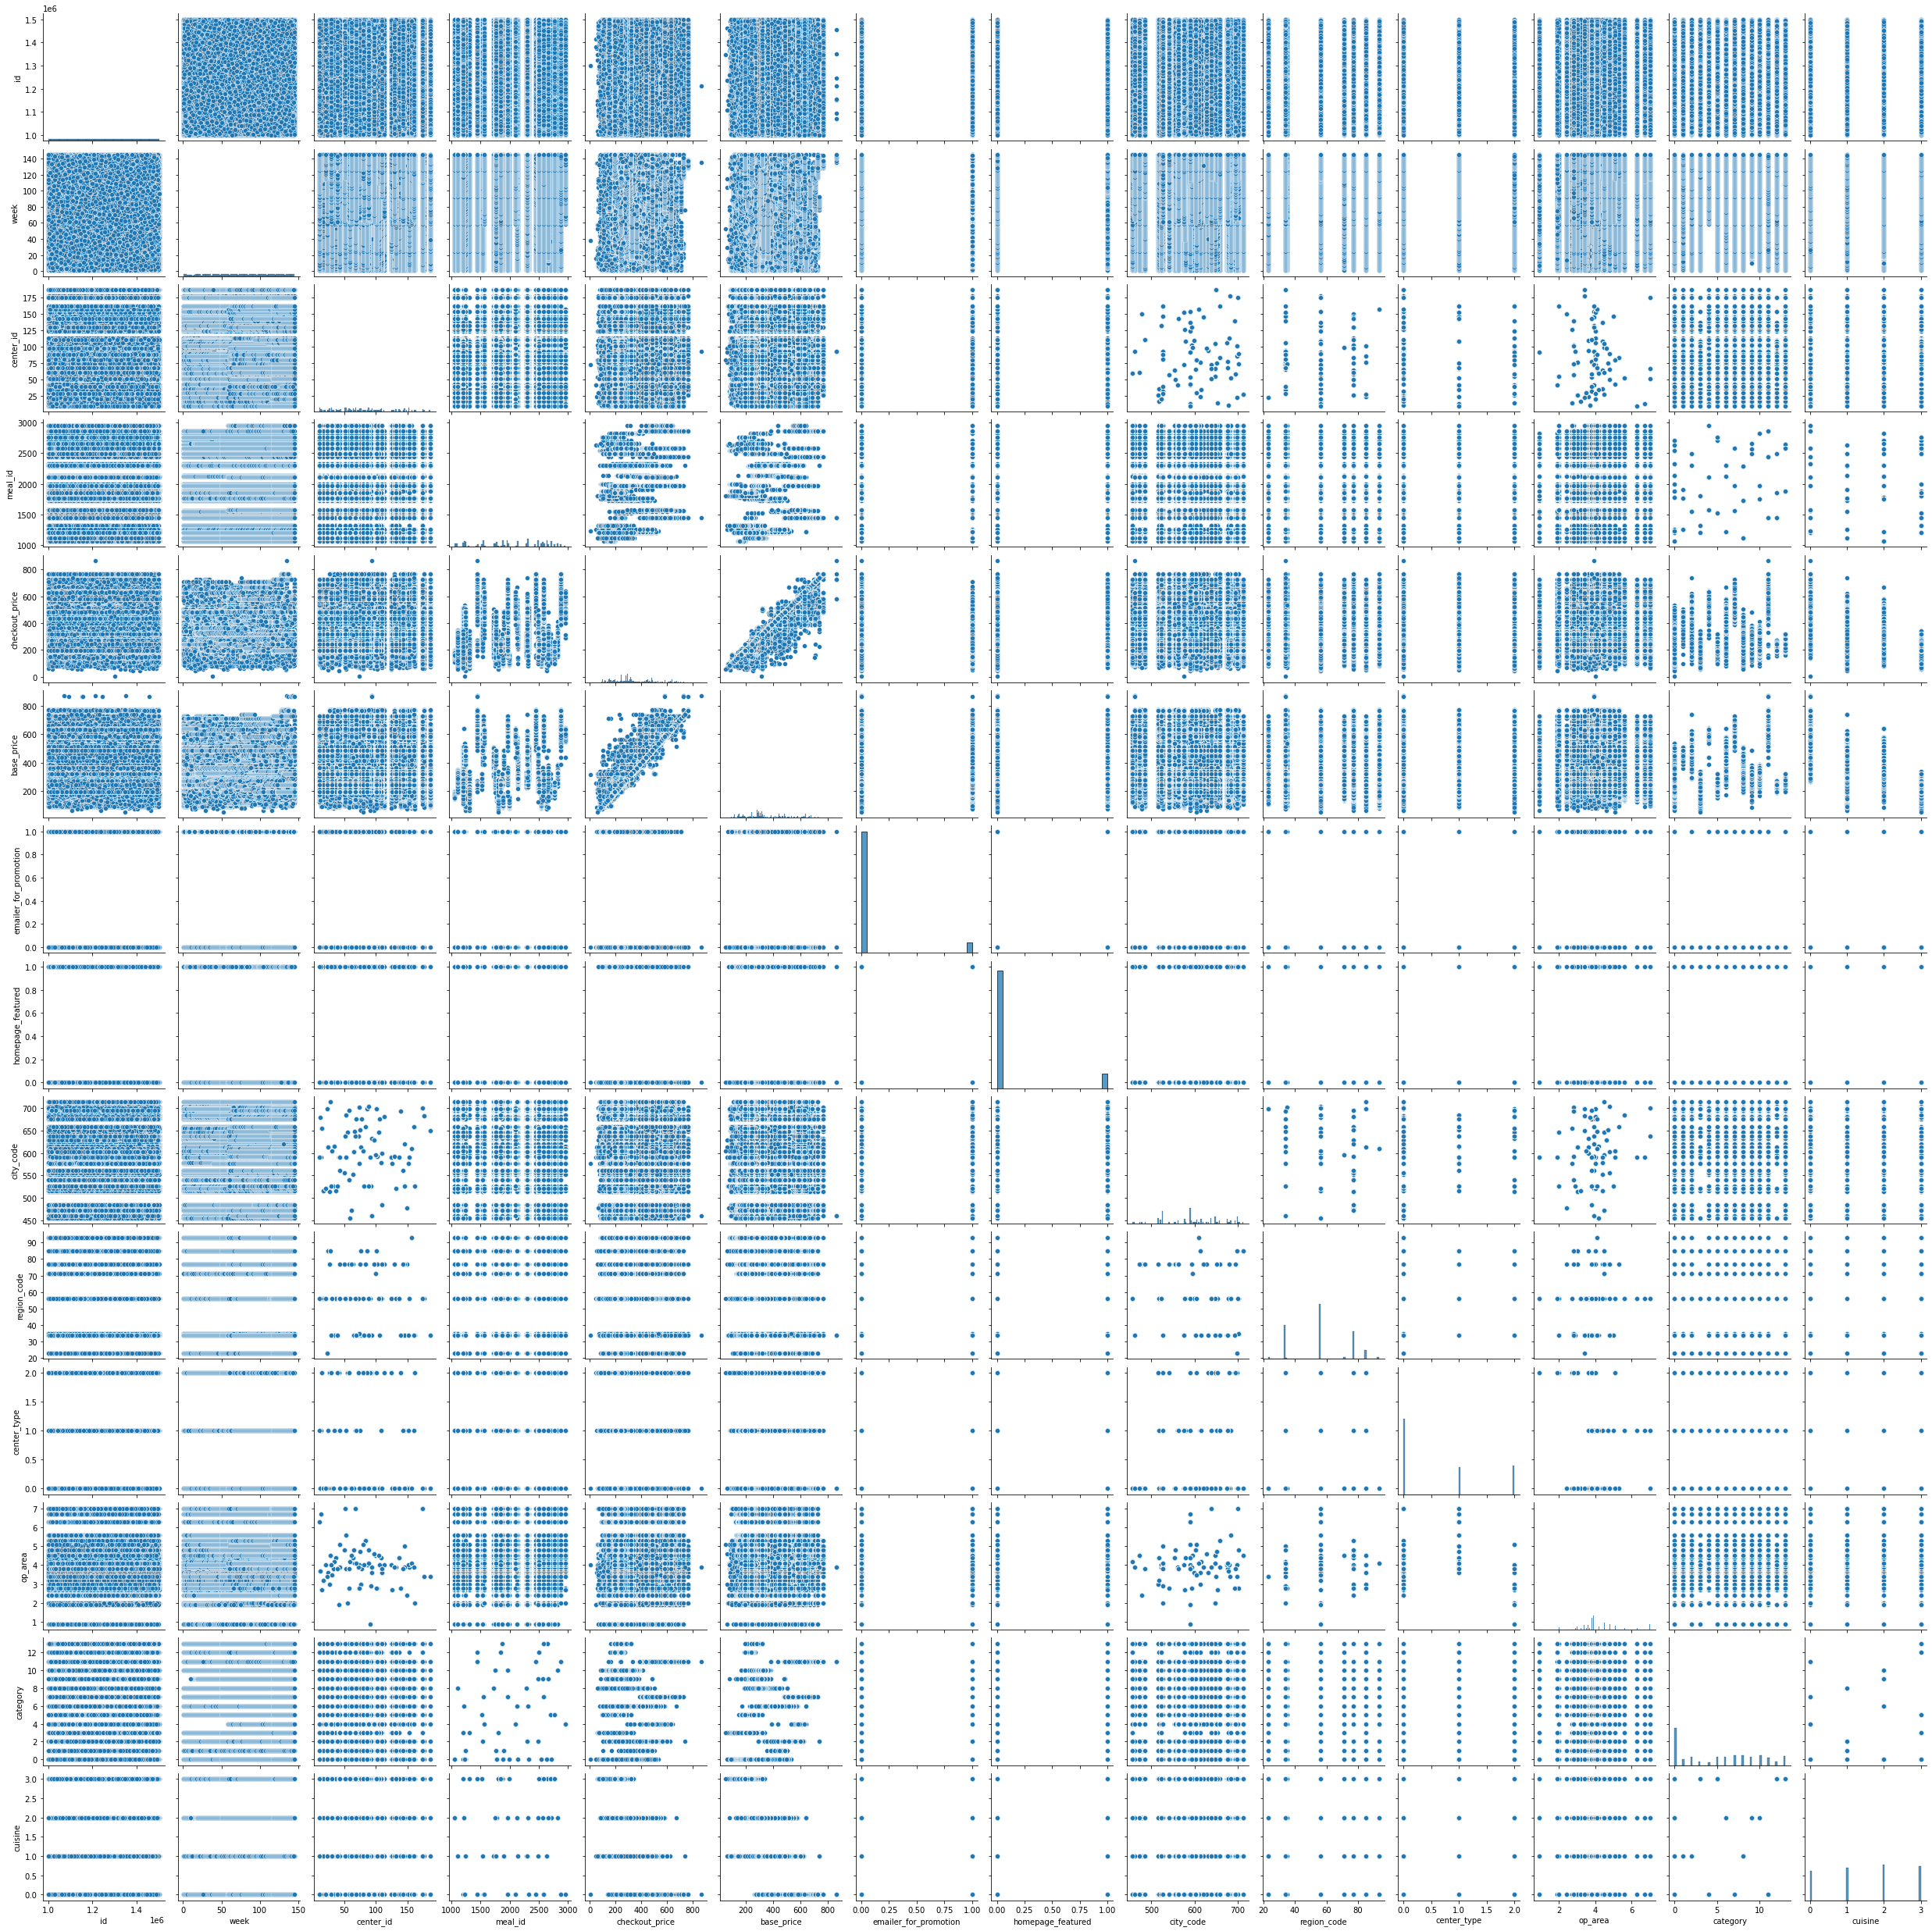

In [154]:
sns.pairplot(features)

## Linear Regression 

In [159]:
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.20,random_state=1705)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [162]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))


R2 score  : 0.2506831530411794
MSE score  : 118520.39453637617
RMSE:  344.26791098848605


## Decision Tree Regressor

In [163]:
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.20,random_state=1705)
dtr_model = DecisionTreeRegressor(max_depth=3,random_state=0)
dtr_model.fit(X_train,y_train)
y_pred = dtr_model.predict(X_test)

In [164]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.27140354218076446
MSE score  : 115243.02434813345
RMSE:  339.4746299035223


## Random Forest Regressor

In [165]:
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.20,random_state=1705)
rf_model = RandomForestRegressor(max_depth=3,random_state=0)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

C:\Users\jowen\anaconda3\envs\azureml\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.2752626388110391
MSE score  : 114632.62614738503
RMSE:  338.57440267596286


Random Forest Regressor algorithm is chosen for this datasets because it has lowest RMSE score

### using selected features

In [168]:
s_features = features[selected_features]

In [171]:
s_features

,week,checkout_price,base_price,homepage_featured,op_area,category
0,1,136.83,152.29,0,2.0,0
1,2,135.83,152.29,0,2.0,0
2,3,132.92,133.92,0,2.0,0
3,4,135.86,134.86,0,2.0,0
4,5,146.50,147.50,0,2.0,0
...,...,...,...,...,...,...
456543,141,583.03,630.53,1,4.5,4
456544,142,581.03,582.03,0,4.5,4
456545,143,583.03,581.03,0,4.5,4
456546,144,582.03,581.03,0,4.5,4


In [169]:
X_train,X_test,y_train,y_test = train_test_split(s_features, target, test_size=0.20,random_state=1705)
rf_model = RandomForestRegressor(max_depth=3,random_state=0)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

C:\Users\jowen\anaconda3\envs\azureml\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.27432371534103517
MSE score  : 114781.13686158553
RMSE:  338.7936493820177


using selected features didn't reduce the RMSE